# Image Compression 

Les KMeans sont très utilisés dans un cas précis qui est la compression d’images. Testons un peu cette fonctionnalité.

0. Importez les librairies usuelles 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

1. Dans Scikit Learn, importez _load_sample_image_ et chargez l’image “china.jpg” ou “flower.jpg”

In [7]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

2. Via matplotlib, visualisez votre image

      a. Indice : On utilisera _imshow_

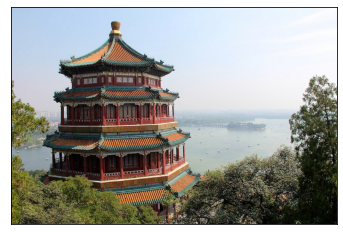

In [8]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

  3. Regardez la taille du dataset, trouver la dimension de notre dataset

In [9]:
china.shape

(427, 640, 3)

----> Notre dataset est découpé entre la hauteur du pixel, la largeur du pixel et sa couleur en RGB

4. Divisez votre dataset par 255 puis redimensionnez le en deux dimensions (longueur x largeur, RGB). 

  a. Indice : On pourra utiliser la méthode ```.reshape()```

In [10]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [16]:
china_scaled = china / 255
china_scaled = china_scaled.reshape(427 * 640, 3)
china_scaled.shape

(273280, 3)

-> Vérifions que le premier pixel est toujours le même!

In [19]:
china[0,0] / 255      # premier pixel

array([0.68235294, 0.78823529, 0.90588235])

In [20]:
china_scaled[0]

array([0.68235294, 0.78823529, 0.90588235])

5. Nous allons réduire le nombre de couleurs à 16. Pour cela créez un algorithme de KMeans qui prendra 16 clusters.

In [21]:
from sklearn.cluster import KMeans

kmeans2  = KMeans( 2, n_init = 5)        # que fait n_init ?
kmeans4  = KMeans( 4, init="random")     # que fait init?
kmeans8  = KMeans( 8, max_iter=500)      # que fait max_iter?
kmeans16 = KMeans(16, tol=0.0000000001)  # que fait tol?

> The k-means problem is solved using either Lloyd’s or Elkan’s algorithm.
> 
> The average complexity is given by $O(k n T)$, were n is the number of samples and T is the number of iteration.
> 
> The worst case complexity is given by $O(n^{k+2/p})$ with $n =$ n_samples, $p =$ n_features. (D. Arthur and S. Vassilvitskii, ‘How slow is the k-means method?’ SoCG2006)
> 
> In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

Au lieu d’utiliser KMeans, vous pouvez utiliser [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)

In [22]:
from sklearn.cluster import MiniBatchKMeans
kmeans32 = MiniBatchKMeans(32)

In [23]:
kmeans = [kmeans2, kmeans4, kmeans8, kmeans16, kmeans32]
for kmean in kmeans:
  kmean.fit(china_scaled)

6. Pour chacune des couleurs présentes dans votre dataset, réassignez le code couleur du centroïd du cluster correspondant dans une variable qu’on appellera _new_colors_

In [25]:
kmeans2.cluster_centers_ # 1 ligne = 1 couleur au format RVB ; attention, les couleurs sont normalisées sur [0;1]

array([[0.28348539, 0.25565775, 0.18533287],
       [0.82429309, 0.85503857, 0.88463875]])

In [31]:
new_colors = kmeans2.cluster_centers_[kmeans2.predict(data)]
# new_colors = [kmeans2.cluster_centers_[e] for e in kmeans2.predict(china_scaled)]
new_colors = np.array(new_colors)
new_colors

array([[0.82429309, 0.85503857, 0.88463875],
       [0.82429309, 0.85503857, 0.88463875],
       [0.82429309, 0.85503857, 0.88463875],
       ...,
       [0.28348539, 0.25565775, 0.18533287],
       [0.28348539, 0.25565775, 0.18533287],
       [0.28348539, 0.25565775, 0.18533287]])

7. Redimensionnez new_colors pour qu’elle soit à 3 dimensions

In [34]:
china_recolored = new_colors.reshape(china.shape)
china_recolored.shape

(427, 640, 3)

8. Visualisez votre nouvelle image avec votre variable _new_colors_

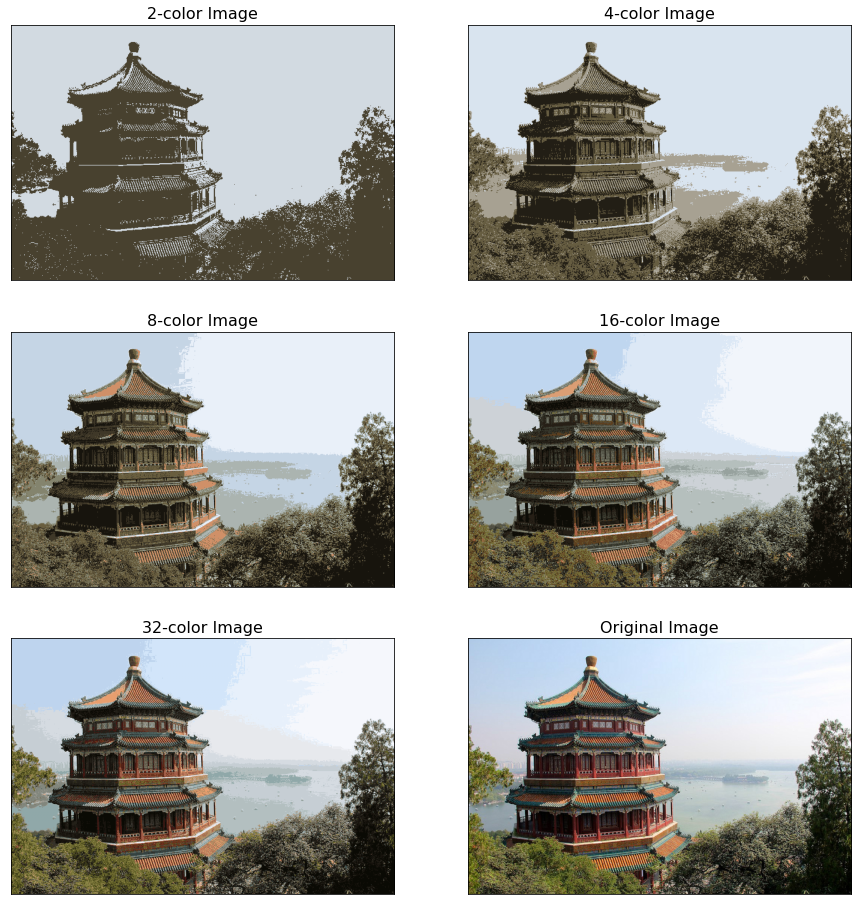

In [56]:
fig, ax = plt.subplots(3, 2, figsize=(16, 16),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[2,1].imshow(china)
ax[2,1].set_title('Original Image', size=16)
for i, kmean in enumerate(kmeans):
  china_recolored = np.array(kmean.cluster_centers_[kmean.predict(data)])
  china_recolored = china_recolored.reshape(china.shape)
  ax[i // 2,i % 2].imshow(china_recolored)
  ax[i // 2,i % 2].set_title('{}-color Image'.format(2**(i+1)), size=16)